<a href="https://colab.research.google.com/github/Bae-hong-seob/GNN_lab/blob/main/basic_GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://mlabonne.github.io/blog/intrognn/

In [ ]:
import torch

In [ ]:
# # Install PyTorch Scatter, PyTorch Sparse, and PyTorch Geometric
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-+.html
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=274491 sha256=a758a5ecef38d551210c9c42091050c5bbef29383cc89617f580557b7457162e
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-scatter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-+.html
     |████████████████████████████████| 2.1 MB 4.1 MB/s 
  Created wheel for torch-sparse: filename=torch_sparse-0.6.15-cp37-cp37m-linux_x86_64.whl size=516860 sha256=87ed9dc5cfa1df64a94e3f1a5b3c47595ce56be16907b88714534fec3ac3e124
  Stored in directory: /root/.cache/pip/wheels/15/68/4d/1414be5c2c622bad35364e13213180797717b6d4b8923936dc
Successfully built torch-sparse
Loo

In [ ]:
# Numpy for matrices
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import networkx as nx 

# 카라테 클럽 class(cluster) 분류

- link(edge) feature만 사용.

In [ ]:
from torch_geometric.datasets import KarateClub

# Import dataset from PyTorch Geometric
dataset = KarateClub()

# Print information
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

KarateClub()
------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [ ]:
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


1. x = [34,34]
- [node수 , feature 수], 즉 34개의 node와 각각 node는 34개의 feature(34차원 벡터)를 가짐.

2. edge_index = [2, 156]
- node가 연결된 방식을 나타냄. [2, number of directed edges]

3. y = [34]
- num of node ground-truth labels. 
- 즉 해당 데이터에서는 모든 node가 해당되는 class 데이터(label)이 존재하므로 34.

4. train_mask = [34]
- train에 사용할 node를 알려주는 선택적 속성

# label과 ground-truth의 차이

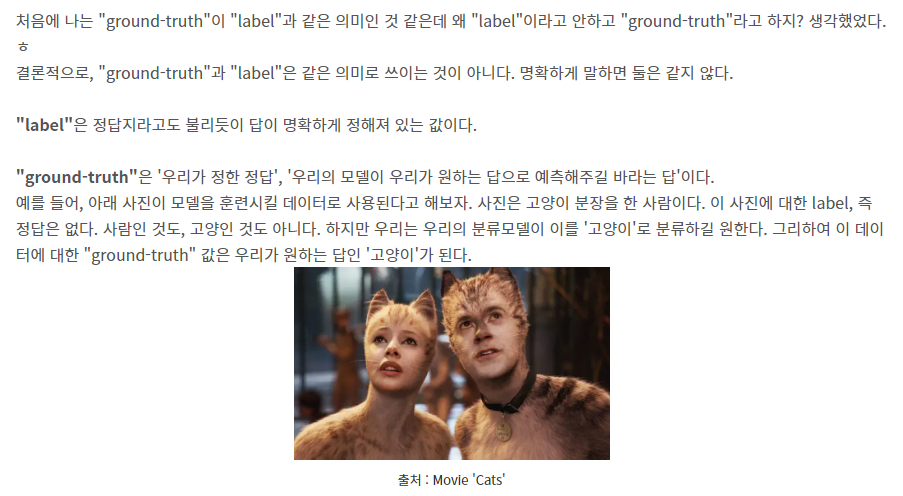

In [ ]:
data = dataset[0]

# Print x
print(f'x = {data.x.shape}')
print(data.x)

x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


앞서 말한것 처럼 link(edge)를 통한 class 분류 작업을 수행하기 때문에 node feature는 단위행렬이다.  
즉, node feature 정보는 존재하지 않으므로 link(edge) feature로만 학습 및 예측을 진행하게 된다.

In [ ]:
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)

edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3, 

edge_index는 앞서 설명한 바와 같이 [2, number of directed edges] 를 나타냅니다.  
따라서 78개의 edge(= undirected edges)가 표현되어 있으며 tensor의 첫번째 배열과 두번째 배열의 같은 순서 i 는 두 node가 연결되어 있음을 뜻합니다.  
- tensor[0][0] 과 tensor[1][0]. 즉 0->1 edge
- tensor[0][16] 과 tensor[1][16]. 즉 1->0 edge

directed edges를 저장하다 보니 78개의 undirected edges를 두번 저장함(=비효율적임)  


In [ ]:
from torch_geometric.utils import to_dense_adj

A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


ㄴ따라서 edge_index를 인접행렬을 사용하여 효율적으로 표현함.

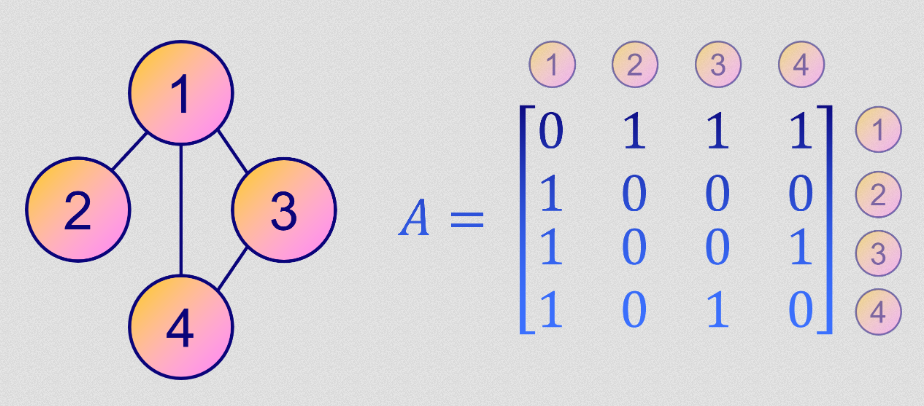

In [ ]:
print(f'y = {data.y.shape}')
print(data.y)

ㄴground-truth label은 단순히 0,1,2,3 으로 encoding함.

In [ ]:
print(f'train_mask = {data.train_mask.shape}')
print(data.train_mask)

train_mask = torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


ㄴ 어떤 node가 train에 사용될지 알려준다. 즉 첫번째 node가 train에 사용됨을 의미한다.

# 유용한 method

In [ ]:
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


1. is_directed() 
- 그래프 내에 edge가 방향성이 있는지

2. has_isloated_nodes()
- node 중에 그래프에서 link 되지 않은 node가 존재하는지

3. has_self_loops()
- node 중에 자체연결(재귀 연결) 된 node가 존재하는지

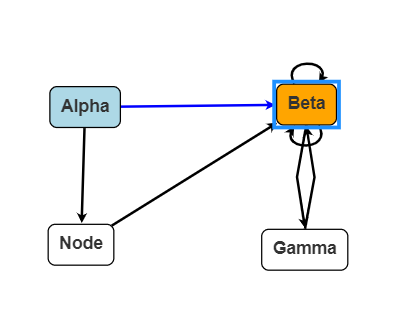

ㄴ self_loop node는 다음과 같은 node로 예시를 들 수 있다.

# to_networkx function을 사용하여 시각화 가능

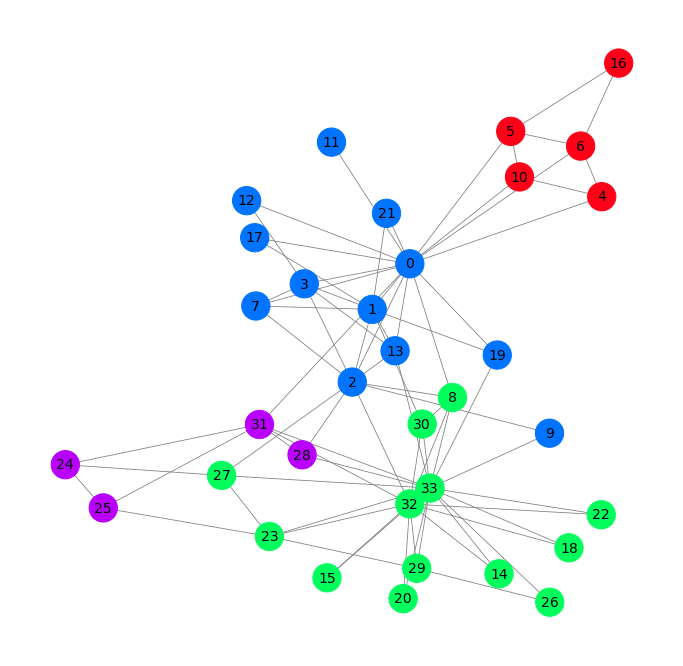

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

# II. Graph Neural Network Layer

## neighborhood aggregation

각 node의 feature는 vector로 저장하지만 이 feature는 neighboorhood node와 같이 연산하여 더욱 정보를 풍부하게 만들 수 있다.  
이는 CNN에서 convolution시 batch안에서 주변 pixel을 함께 고려하는 것과 같은 기능이라고 볼 수 있다.

## 문제점 1

pixel과 다르게 node는 순서를 띄지 않는다.(Permutation invariant)
- permutation invariant란 입력 벡터 요소의 순서와 상관없이 같은 출력을 생성하는 모델을 말합니다.

- permutation invariant 모델의 대표적인 예로 MLP(Multi Layer Perceptron)가 있습니다.

- 반면에 CNN (Convolutional Neural Network), RNN (Recurrent Neural Network)는 permutation invariant 모델이 아닙니다.

## Solution

각 node 마다 unique 한 W를 사용하는 것이 아닌 하나의 동일한 W(weight) vector를 사용.

## 문제점 2

pixel과 다르게 node는 nighborhood의 수가 통일되어 있지 않다.
- pixel의 neighborhood는 3x3 batch size를 가진다고 해도 되지만, node의 경우 어떤 node는 하나의 이웃만, 어떤 node는 500개의 이웃을 가질 수 있음.

## Solution  

정규화 기법 사용

##Conclusion:

1. Nodes don't have any idea of order, which forced us to use a common weight **W**
2. Nodes have a variable number of neighbors, which pushed us to **normalize** our result by dividing it by the number of neighbors

In [ ]:
# a numpy array with integers instead of floats
X = data.x.numpy().astype(int)

print(f'X = {X.shape}')
print(X)

X = (34, 34)
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
W = np.identity(X.shape[0], dtype=int)

print(f'W = {W.shape}')
print(W)

W = (34, 34)
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [ ]:
A_tilde = A + np.identity(A.shape[0], dtype=int)

print(f'\nA_tilde = {A_tilde.shape}')
print(A_tilde)


A_tilde = (34, 34)
[[1 1 1 ... 1 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 1 0]
 ...
 [1 0 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [ ]:
H = A_tilde.T @ X @ W.T

print(f'H = A_tilde.T @ X @ W.T {H.shape}')
print(H)

H = A_tilde.T @ X @ W.T (34, 34)
[[1 1 1 ... 1 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 1 0]
 ...
 [1 0 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [ ]:
D = np.zeros(A.shape, dtype=int)
np.fill_diagonal(D, A.sum(axis=0))

print(f'D = {D.shape}')
print(D)

D_tilde = np.zeros(D.shape, dtype=int)
np.fill_diagonal(D_tilde, A_tilde.sum(axis=0))

print(f'\nD_tilde = {D_tilde.shape}')
print(D_tilde)

D = (34, 34)
[[16  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 17]]

D_tilde = (34, 34)
[[17  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 18]]


In [ ]:
D_inv = np.linalg.inv(D_tilde)
print(f'D_inv = {D_inv.shape}')
print(D_inv)

H = D_inv @ A_tilde.T @ X @ W.T
print(f'\nH = D_inv @ A.T @ X @ W.T {H.shape}')
print(H)

D_inv = (34, 34)
[[0.05882353 0.         0.         ... 0.         0.         0.        ]
 [0.         0.1        0.         ... 0.         0.         0.        ]
 [0.         0.         0.09090909 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.14285714 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.05555556]]

H = D_inv @ A.T @ X @ W.T (34, 34)
[[0.05882353 0.05882353 0.05882353 ... 0.05882353 0.         0.        ]
 [0.1        0.1        0.1        ... 0.         0.         0.        ]
 [0.09090909 0.09090909 0.09090909 ... 0.         0.09090909 0.        ]
 ...
 [0.14285714 0.         0.         ... 0.14285714 0.14285714 0.14285714]
 [0.         0.         0.07692308 ... 0.07692308 0.07692308 0.07692308]
 [0.         0.         0.         ... 0.05555556 0.05555556 0.05555556]]


# III. Graph Neural Network

In [ ]:
D_inv12 = np.linalg.inv(D_tilde)
np.fill_diagonal(D_inv12, 1/ (D_tilde.diagonal()**0.5))

# New H
H = D_inv12 @ A_tilde.T @ D_inv12 @ X @ W.T
print(f'\nH = D_inv12 @ A.T @ D_inv12 @ X @ W.T {H.shape}')
print(H)


H = D_inv12 @ A.T @ D_inv12 @ X @ W.T (34, 34)
[[0.05882353 0.0766965  0.07312724 ... 0.09166985 0.         0.        ]
 [0.0766965  0.1        0.09534626 ... 0.         0.         0.        ]
 [0.07312724 0.09534626 0.09090909 ... 0.         0.0836242  0.        ]
 ...
 [0.09166985 0.         0.         ... 0.14285714 0.10482848 0.08908708]
 [0.         0.         0.0836242  ... 0.10482848 0.07692308 0.06537205]
 [0.         0.         0.         ... 0.08908708 0.06537205 0.05555556]]


In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, dataset.num_classes)

    def forward(self, x, edge_index):
      h = self.gcn(x, edge_index)
      embedding = torch.relu(h)
      z = self.out(embedding)

      return h, embedding, z

model = GNN()
print(model)

GNN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [ ]:
model = GNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

# Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []

# Training loop
for epoch in range(201):
    # Clear gradients
    optimizer.zero_grad()

    # Forward pass
    h, embedding, z = model(data.x, data.edge_index)

    # Calculate loss function
    loss = criterion(z, data.y)

    # Calculate accuracy
    acc = accuracy(z.argmax(dim=1), data.y)

    # Compute gradients
    loss.backward()

    # Tune parameters
    optimizer.step()

    # Store data for animations
    embeddings.append(embedding)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))

    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss: 1.36 | Acc: 35.29%
Epoch  10 | Loss: 1.16 | Acc: 64.71%
Epoch  20 | Loss: 0.93 | Acc: 73.53%
Epoch  30 | Loss: 0.64 | Acc: 88.24%
Epoch  40 | Loss: 0.39 | Acc: 88.24%
Epoch  50 | Loss: 0.23 | Acc: 97.06%
Epoch  60 | Loss: 0.14 | Acc: 100.00%
Epoch  70 | Loss: 0.09 | Acc: 100.00%
Epoch  80 | Loss: 0.06 | Acc: 100.00%
Epoch  90 | Loss: 0.04 | Acc: 100.00%
Epoch 100 | Loss: 0.03 | Acc: 100.00%
Epoch 110 | Loss: 0.02 | Acc: 100.00%
Epoch 120 | Loss: 0.02 | Acc: 100.00%
Epoch 130 | Loss: 0.02 | Acc: 100.00%
Epoch 140 | Loss: 0.01 | Acc: 100.00%
Epoch 150 | Loss: 0.01 | Acc: 100.00%
Epoch 160 | Loss: 0.01 | Acc: 100.00%
Epoch 170 | Loss: 0.01 | Acc: 100.00%
Epoch 180 | Loss: 0.01 | Acc: 100.00%
Epoch 190 | Loss: 0.01 | Acc: 100.00%
Epoch 200 | Loss: 0.01 | Acc: 100.00%


In [ ]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

def animate(i):
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=outputs[i],
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="grey",
                    font_size=14
                    )
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=20)

fig = plt.figure(figsize=(12, 12))
plt.axis('off')

anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, 200, 10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())

In [ ]:
display(html)

In [ ]:
print(f'Final embeddings = {embedding.shape}')
print(embedding)

Final embeddings = torch.Size([34, 3])
tensor([[2.5501e+00, 2.1682e-01, 3.3118e+00],
        [3.2215e+00, 0.0000e+00, 2.4455e+00],
        [2.4275e+00, 7.7145e-02, 2.0124e+00],
        [2.6643e+00, 0.0000e+00, 2.4184e+00],
        [3.3498e-01, 2.2560e+00, 2.4374e+00],
        [1.1935e-01, 2.5052e+00, 2.7489e+00],
        [1.4428e-01, 2.4407e+00, 2.5923e+00],
        [2.2229e+00, 2.8281e-03, 2.1470e+00],
        [1.9368e+00, 1.4670e+00, 3.9591e-01],
        [1.8794e+00, 9.9607e-02, 1.6800e+00],
        [2.5689e-01, 2.3084e+00, 2.4768e+00],
        [2.2689e+00, 1.6464e-01, 2.1891e+00],
        [2.2448e+00, 1.0474e-01, 2.1286e+00],
        [2.2106e+00, 1.0740e-01, 1.9569e+00],
        [1.5140e+00, 1.6724e+00, 2.8618e-01],
        [1.5449e+00, 1.5798e+00, 2.4302e-01],
        [0.0000e+00, 2.4119e+00, 2.4673e+00],
        [2.2079e+00, 5.1785e-02, 2.0350e+00],
        [1.4944e+00, 1.5487e+00, 2.3748e-01],
        [2.0820e+00, 1.5380e-01, 1.8876e+00],
        [1.6026e+00, 1.7190e+00, 2.8317e-

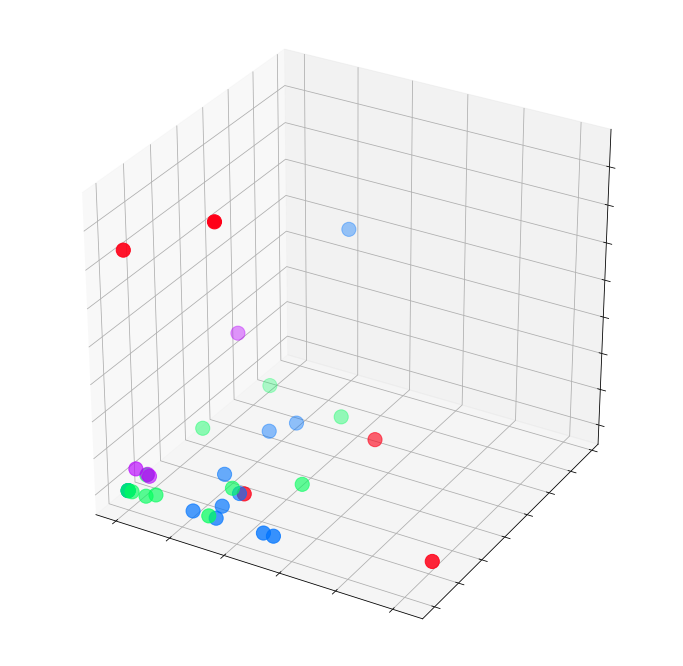

In [ ]:
embed = embeddings[0].detach().cpu().numpy()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.patch.set_alpha(0)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)

plt.show()

In [ ]:
%%capture

def animate(i):
    embed = embeddings[i].detach().cpu().numpy()
    ax.clear()
    ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=40)

fig = plt.figure(figsize=(12, 12))
plt.axis('off')
ax = fig.add_subplot(projection='3d')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

anim = animation.FuncAnimation(fig, animate, \
              np.arange(0, 200, 10), interval=800, repeat=True)
html = HTML(anim.to_html5_video())

In [ ]:
display(html)